# Sort the lines of code 

In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

### dataframe 

In [83]:
# read in the file 
pop = pd.read_excel('../data/gapminder_population.xlsx', index_col=0)

# sum up the world population for each year
# this also transposes the DataFrame 
pop = pop.sum()

# make the year index into integer 
pop.index = pop.index.astype(int)

pop.head()

1800    9.475635e+08
1810    9.917285e+08
1820    1.044587e+09
1830    1.104342e+09
1840    1.160231e+09
dtype: float64

In [84]:
# make a logarithmic dataframe 
logpop = np.log(pop)

# remove all empty lines 
logpop.dropna(inplace=True)

In [85]:
# set the function m 
m = LinearRegression()

# read in the values for X and y from the logpop
X = logpop.index.values.reshape(-1, 1)
y = logpop.values

In [86]:
# fit the linear Regression to the data
m.fit(X, y)

# set y to the predicted value by m.predict
ypred = m.predict(X)

# generate future data points and predict population 
xfuture = [[2020], [2030]]
yfuture = m.predict(xfuture)
yfuture = np.exp(yfuture) / 1000_000_000

In [87]:
# print the future population for the forcasted years 
for year, forecast in zip(xfuture, yfuture):
    print(f"population forecast for {year}: {forecast:5.1f} bln")

population forecast for [2020]:   7.5 bln
population forecast for [2030]:   8.4 bln


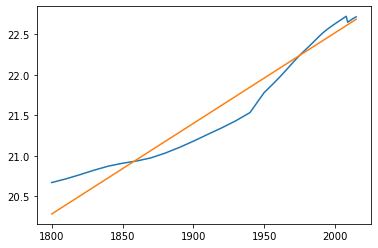

intercept:  0.17742100520356985
slope    :  0.011169374984631445
R-squared:  0.9485144752289159


In [88]:
# plot the data and the predicted linear regression 
plt.plot(X, y)
plt.plot(X, ypred)
plt.show()

print("intercept: ", m.intercept_)
print("slope    : ", m.coef_[0])
print("R-squared: ", m.score(X, y))
